In [1]:
import numpy as np
import matplotlib.pyplot as plt

Izhikevich (2003), IEEE

# Fig. 2

args = (a,b,c,d,I) 를 조절하여 주어진 모델에 대해서 매우 다양한 spikes 를 살펴볼 수 있다.

In [2]:
def vdot(u, v, *args):
    I = args[4]
    return 0.04*v*v + 5*v + 140 - u + I

In [3]:
def udot(u, v, *args):
    a = args[0]
    b = args[1]
    return a*(b*v - u)

In [4]:
def reset_uv(u, v, *args):
    c = args[2]
    d = args[3]
    if v >= 30:
        v = c
        u += d
        return u, v
    else:
        return u, v

In [5]:
def init_uv(v0, b):
    return [v0*b], [v0]

Euler method 가 아닌, 4차 Runge-Kutta method 를 사용하였다.

In [6]:
def RK4(u, v, *args, h):
    args = np.array(args)
    
    ku1 = h*udot(u, v, *args)
    kv1 = h*vdot(u, v, *args)
    
    ku2 = h*udot(u + 0.5*ku1, v + 0.5*kv1, *args)
    kv2 = h*vdot(u + 0.5*ku1, v + 0.5*kv1, *args)
    
    ku3 = h*udot(u + 0.5*ku2, v + 0.5*kv2, *args)
    kv3 = h*vdot(u + 0.5*ku2, v + 0.5*kv2, *args)
    
    ku4 = h*udot(u + ku3, v + kv3, *args)
    kv4 = h*vdot(u + ku3, v + kv3, *args)
    
    u += (ku1 + 2*ku2 + 2*ku3 + ku4)/6.
    v += (kv1 + 2*kv2 + 2*kv3 + kv4)/6.
    
    u, v = reset_uv(u, v, *args)
    
    return u, v

In [7]:
def params(model):
    if model in ['LTS', 'TC']:
        a = 0.02
        b = 0.25
    elif model in ['RS', 'IB', 'CH']:
        a = 0.02
        b = 0.2
    elif model in ['RZ']:
        a = 0.1
        b = 0.26
    elif model in ['FS']:
        a = 0.1
        b = 0.2

    if model in ['RS']:
        c = -65
        d = 8
    elif model in ['FS', 'LTS', 'RZ']:
        c = -65
        d = 2
    elif model in ['TC']:
        c = -65
        d = 0.05
    elif model in ['IB']:
        c = -55
        d = 4
    elif model in ['CH']:
        c = -50
        d = 2
        
    return a,b,c,d

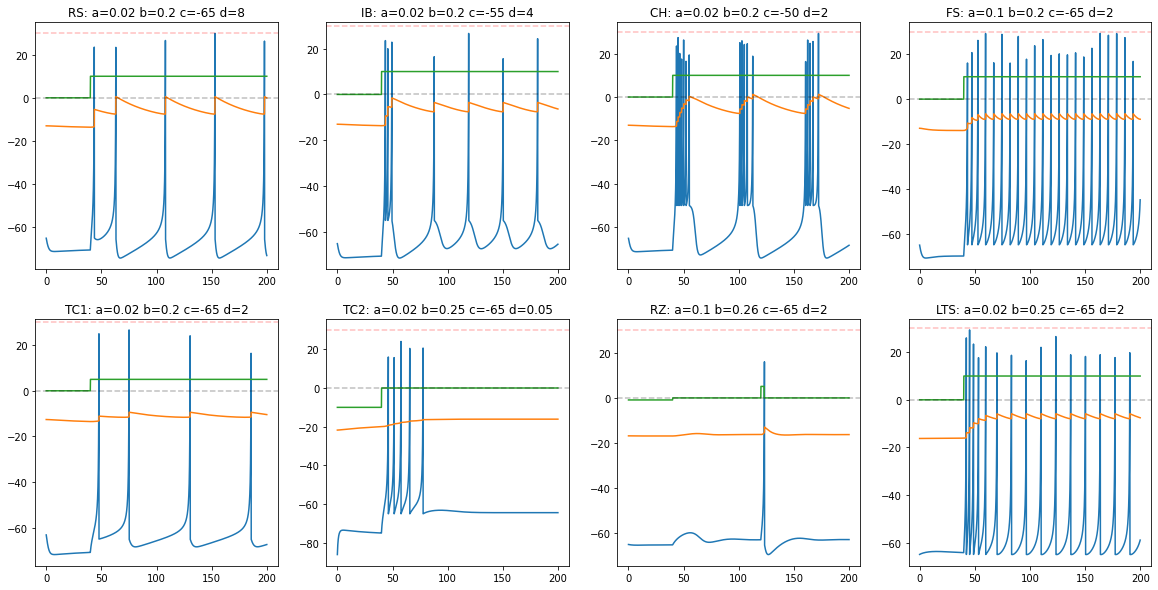

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axs = np.concatenate(axs)

for i, model in enumerate(['RS', 'IB', 'CH', 'FS', 'TC1', 'TC2', 'RZ', 'LTS']):
    dt = .05
    if model == 'TC1':
        a,b,c,d = params('TC')
        b, d = 0.2, 2
        u,v = init_uv(-63, b)
        
        tmp = list(0 * np.ones(np.arange(0, 40, dt).shape[0]))
        tmp += list(5 * np.ones(np.arange(40, 200, dt).shape[0]))
        tmp = np.array(tmp)
        I = tmp
    elif model == 'TC2':
        a,b,c,d = params('TC')
        u,v = init_uv(v0=-87, b=b)
        
        tmp = list(-10 * np.ones(np.arange(0, 40, dt).shape[0]))
        tmp += list(0 * np.ones(np.arange(40, 200, dt).shape[0]))
        tmp = np.array(tmp)
        I = tmp 
    else:
        a,b,c,d = params(model)
        u,v = init_uv(v0=-65, b=b)
        
        if model == 'RZ':
            tmp = list(-1 * np.ones(np.arange(0, 40, dt).shape[0]))
            tmp += list(-0.1 * np.ones(np.arange(40, 120, dt).shape[0]))
            tmp += list(5 * np.ones(np.arange(120, 123, dt).shape[0]))
            tmp += list(-0.1 * np.ones(np.arange(123, 200, dt).shape[0]))
            tmp = np.array(tmp)
            I = tmp
        else:
            tmp = list(0 * np.ones(np.arange(0, 40, dt).shape[0]))
            tmp += list(10 * np.ones(np.arange(40, 200, dt).shape[0]))
            tmp = np.array(tmp)
            I = tmp
        
    for n, t in enumerate(np.arange(0, 200, dt)):
        tmpu, tmpv = RK4(u[-1], v[-1], a,b,c,d,I[n], h=dt)
        u.append(tmpu)
        v.append(tmpv)
        
    ax = axs[i]
    ax.plot(np.arange(0, 200, dt), v[1:])
    ax.plot(np.arange(0, 200, dt), u[1:])
    ax.plot(np.arange(0, 200, dt), I)
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.25)
    ax.axhline(y=30, color='r', linestyle='--', alpha=0.25)
    ax.set_title('%s: a=%g b=%g c=%g d=%g'%(model, a,b,c,d))

# Fig. 3

이 시뮬레이션은 1000개의 뉴런 (800개의 흥분성, 200개의 억제성 뉴런들)으로 구성된 네트워크를 만들었으며, 매개변수를 조절하여 흥분성 뉴런과 억제성 뉴런의 firing 을 비교하여 살펴본다. 시뮬레이션은 1000 ms 동안 실행되며 앞에서 언급한 유형을 사용하지 않았다. 대신 일부 값은 실제 뉴런과 유사한 변동성을 추가하기 위해 랜덤하게 계산했다. 시뮬레이션 결과, <b>top</b> 에서는 전체 시간 동안 모든 spikes 를 볼 수 있고, <b>others</b> 에서는 첫번째 뉴런의 $v(t)$ 및 $u(t)$를 살펴보았다.

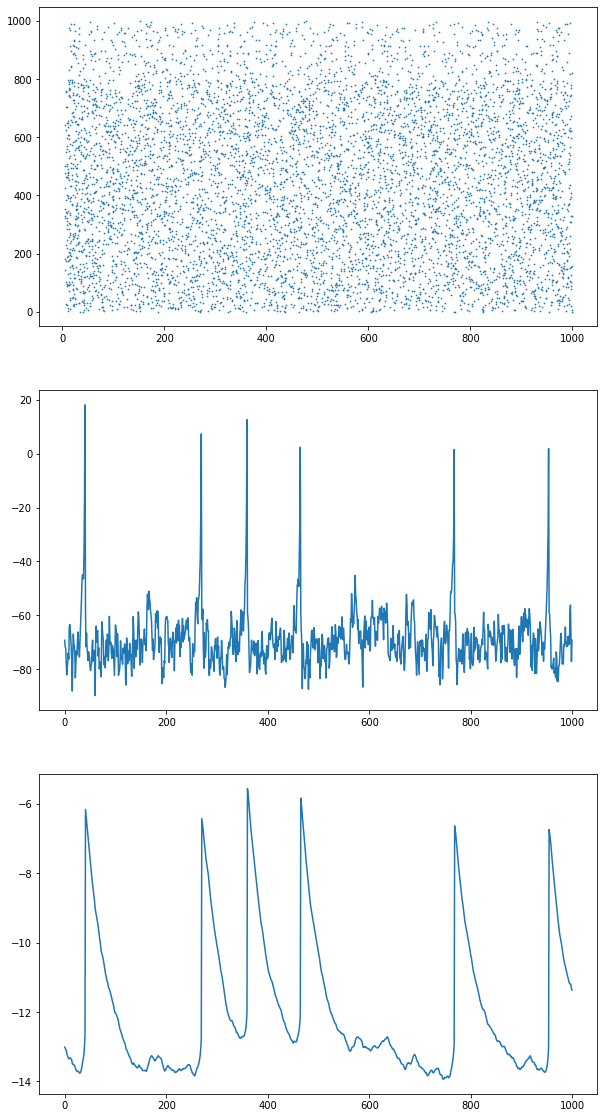

In [9]:
Ne = 800
Ni = 200

re = np.random.rand(Ne)
ri = np.random.rand(Ni)

a = np.concatenate([0.02*np.ones(Ne), 0.02 + 0.08*ri])
b = np.concatenate([0.2*np.ones(Ne), 0.25 - 0.05*ri])
c = np.concatenate([-65 + 15*re**2, -65*np.ones(Ni)])
d = np.concatenate([8 - 6*re**2, 2*np.ones(Ni)])
s = np.hstack((0.5*np.random.rand(Ne+Ni, Ne), -np.random.rand(Ne+Ni, Ni)))

v = -65*np.ones(Ne+Ni);
u = b*v

x = []
y = []
v1 = []
u1 = []

for t in range(1000):
    
    I = np.hstack((10*np.random.normal(0, 1, size=(Ne)), 4*np.random.normal(0, 1, size=(Ni))))
    v+=0.5*(0.04*v**2 + 5*v + 140 - u + I)
    u+=a*(b*v - u)

    fired = np.where(v>30)[0]
    x.append(t+0*fired)
    y.append(fired)

    I+= s[:,fired].sum(axis=1)
    
    v[fired]=c[fired]
    u[fired]=u[fired]+d[fired]
    v1.append(v[0])
    u1.append(u[0])

x = np.concatenate(x)
y = np.concatenate(y)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,20))

axs[0].scatter(x,y, s=.5,)
axs[1].plot(range(1000), v1)
axs[2].plot(range(1000), u1)